<a href="https://colab.research.google.com/github/donkey-king-kong/SC1015_MiniProject_Team1/blob/main/Cyberbullying_in_Tweets_FullCodeWithFullDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cyberbullying Detection in Tweets**
####**FCS3- Team 1**

####**Babu Sankar Nithin Sankar | Singh Gunraj | Zhan You Lau**


##twitter-m-a.avif

##Introduction and Problem Formulation
In today's interconnected world, social media platforms serve as primary avenues for communication and self-expression. However, amid the vast digital landscape, instances of cyberbullying persist, posing significant threats to individuals' mental health and well-being. To confront this pervasive issue head-on, our project aims to develop an advanced cyberbullying tweet detection model. This system goes beyond mere identification of harmful content; it's designed to categorize cyberbullying instances based on nuanced demographic attributes such as age, gender, religion, ethnicity, and specific themes.

####**Our Key Objectives: **

1) Developing a robust machine learning model capable of accurately detecting cyberbullying tweets.

2) To enhance the detection system to classify cyberbullying tweets based on demographic attributes, including age, gender, religion, ethnicity.

3) Optimizing Model performance using various machine learning algorithms, including Logistic Regression, Naive Bayes, and LSTM RNN

####**Dataset used-* *

https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

This dataset contains more than 47000 tweets labelled according to the class of cyberbullying: Age, Ethnicity, Gender, Religion, Other type of cyberbullying,  Not cyberbullying

####**TRIGGER Warning-* *

These tweets either describe a bullying event or are the offense themselves, therefore explore it to the point where you feel comfortable.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


##Data Preparation and Cleaning

The following actions are performed to the data present in our dataset to bring a uniformity and remove any stray characters to improve effeciency of our model.

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to make text lowercase
def make_lowercase(text):
    lower = text.lower()
    return lower

# Function to remove mentions (@username) from text
def remove_mentions(text):
    clean_text = re.sub(r'@\S+', '', text)
    return clean_text

# Function to remove punctuation from text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    clean_text = text.translate(translator)
    return clean_text

# Function to remove URLs from text
def remove_url(text):
    clean_text = re.sub(r'http|www\S+', '', text)
    return clean_text

# Function to remove extra whitespaces from text
def remove_extraspace(text):
    words = text.split()
    updated_text = " ".join(words)
    return updated_text

# Function to remove stopwords from text
def remove_stopwords(text):
    tweet_words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tweet_words if word not in stop_words]
    filtered_tweet = " ".join(filtered_words)
    return filtered_tweet

# Function to remove HTML characters (e.g., &amp;) from text
def remove_strayHTML(text):
    clean_text = text = re.sub(r'&\S+;', '', text)
    return clean_text

# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to remove picture links (e.g., pic.twitter.com) from text
def remove_piclinks(text):
    return re.sub(r'pictwitter\S+', '', text)

# Function to remove short words (length <= 2) from text
def remove_shortwords(text):
    words = text.split()
    long_words = [word for word in words if len(word) > 2]
    return ' '.join(long_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# A single function to preprocess the entire tweets data
def clean_text(text):
    text=make_lowercase(text)
    text=remove_stopwords(text)
    text=remove_mentions(text)
    text=remove_strayHTML(text)
    text=remove_punctuation(text)
    text=remove_url(text)
    text=remove_extraspace(text)
    text=remove_numbers(text)
    text=remove_piclinks(text)
    text=remove_shortwords(text)
    return text

In [ ]:
# Apply the clean_text function to each tweet in the 'tweet_text' column of the DataFrame
df['tweet_clean'] = [clean_text(tweet) for tweet in df['tweet_text']]
df.head(5)

,tweet_text,cyberbullying_type,tweet_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...


##Exploratory Analysis

To analyse and visualze the data we have cleaned to understand its underlying patterns, relationships and anomalies. We would be using data visualization techniques in hopes of generating insights that could help us better understand the data before applying any models or conducting any hypothesis testing.

####**Preliminary Exploration- The Numbers Game**

The "numbers game" is used in our exploratory data analysis where we systematically examined numerical data to identify patterns, trends and anmoalies. Here, we plot the number of tweets belonging to each category in the dataset as well as their relative percentages.

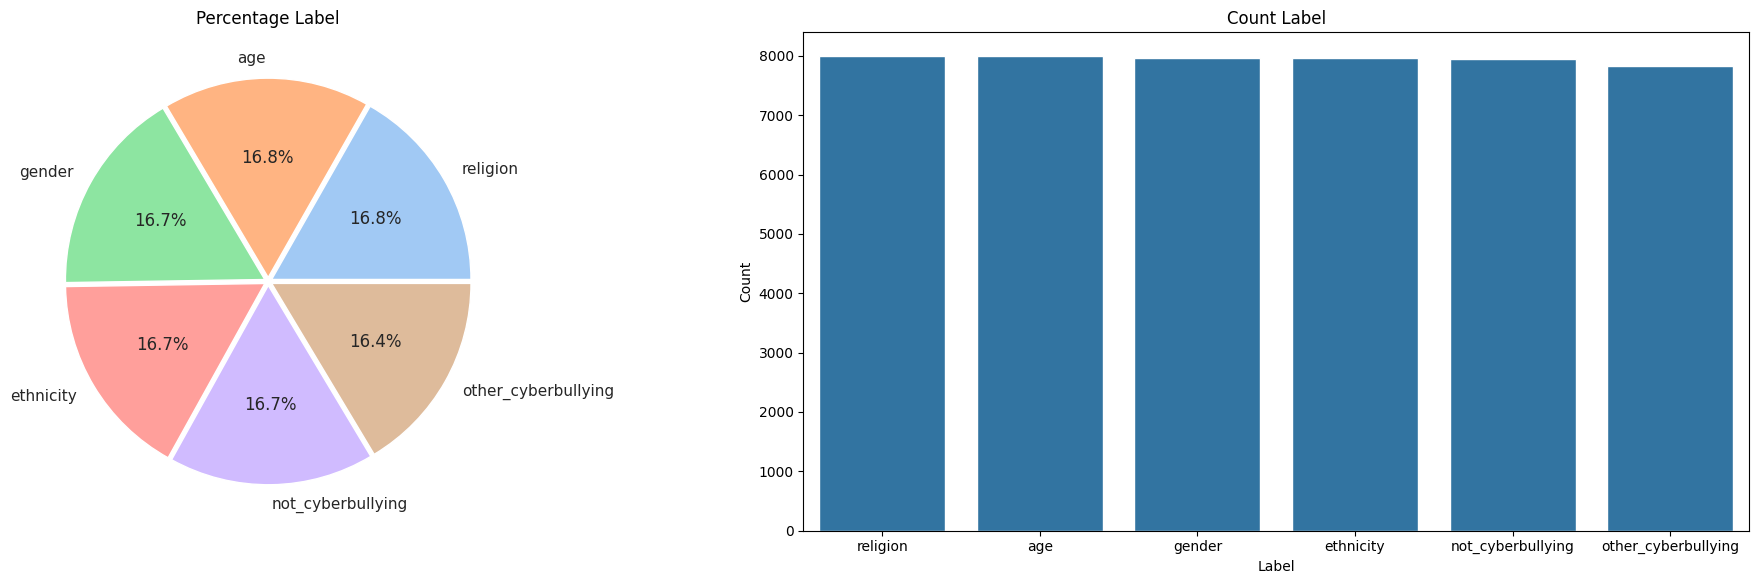

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Count occurrences of each label in 'cyberbullying_type' column
label_count = df['cyberbullying_type'].value_counts()

# Create subplots for pie chart and bar chart
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set seaborn theme and palette
sb.set_theme(style='darkgrid', palette='pastel')

# Define colors and explode values for pie chart
color = sb.color_palette('pastel')
explode = [0.02] * len(label_count)

# Plot pie chart showing percentage of each label
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

# Plot bar chart showing count of each label
sb.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Display the plots
plt.show()

####**Plotting Most Common Words by Tokenisation**

Here, we used tokenization to break down a piece of text like sentences or paragraphs into individual worlds or "tokens". From this plot, we can see the most common words in the tweets of our data.

<ipython-input-17-ab9ba26e409d>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=keys, y=values, palette='mako')


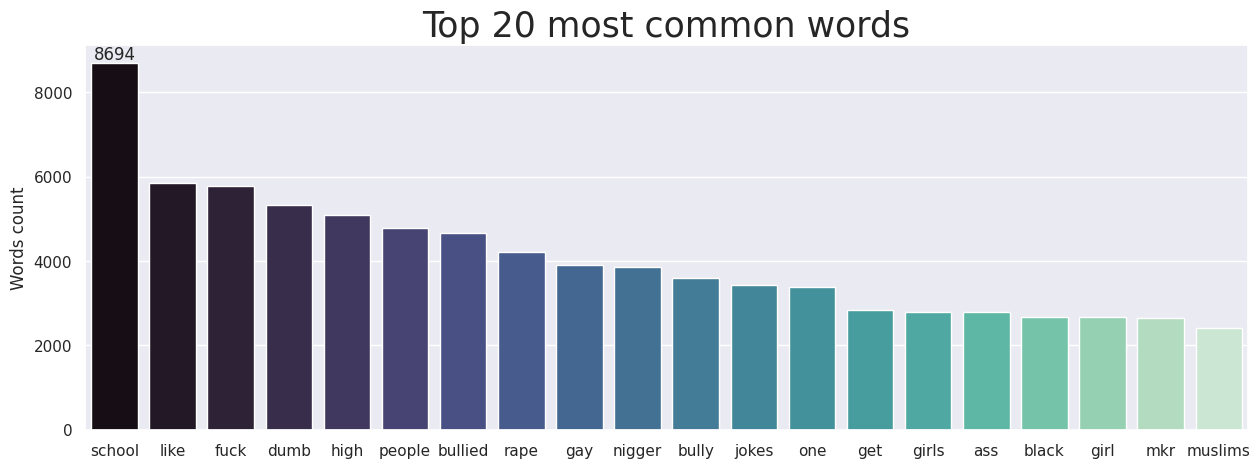

In [ ]:
from collections import Counter
import numpy as np

# Define a function to tokenize the text column
def Tokenize(column, seq_len):
    # Create a corpus of words from the text column
    corpus = [word for text in column for word in text.split()]

    # Count the occurrences of each word in the corpus
    count_words = Counter(corpus)

    # Sort words based on their frequencies
    sorted_words = count_words.most_common()

    # Assign unique integer indices to words
    vocab_to_int = {w: i + 1 for i, (w, c) in enumerate(sorted_words)}

    # Tokenize each text in the column using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)

    # Pad/truncate sequences to match the specified sequence length
    features = np.zeros((len(text_int), seq_len), dtype=int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

# Tokenize the tweet_clean column
vocabulary, tokenized_column = Tokenize(df["tweet_clean"], 300)

# Extract the top 20 most common words and their frequencies from the vocabulary
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

# Plotting the top 20 most common words
plt.figure(figsize=(15, 5))
ax = sb.barplot(x=keys, y=values, palette='mako')
plt.title('Top 20 most common words', size=25)
ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()

####**Word Cloud**

For this section, we used a WordCloud to present the most commonly seen words according to each classified category. The presence of each words in a tweet will increase its corresponding probability towards being classified into its respective category.



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(data):
    # Filter text data for a specific cyberbullying type
    text = df[df['cyberbullying_type'] == data]

    # Concatenate all cleaned tweets into a single string
    text_cloud = " ".join(txt for txt in text['tweet_clean'])

    # Generate word cloud
    cloud = WordCloud(collocations=False, background_color='white').generate(text_cloud)

    # Display the word cloud
    plt.imshow(cloud)
    plt.axis('off')  # Hide axis

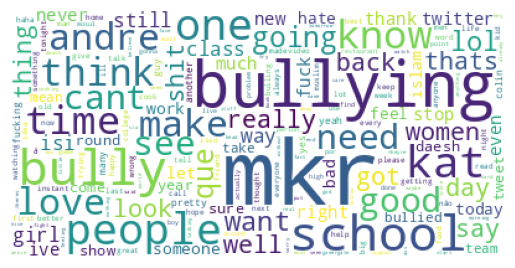

In [ ]:
word_cloud('not_cyberbullying')

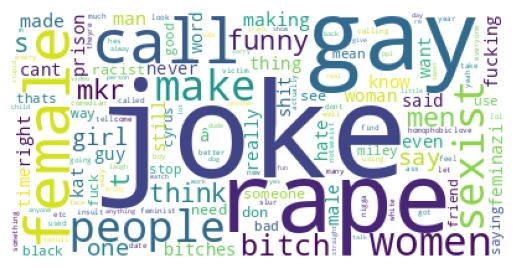

In [ ]:
word_cloud('gender')

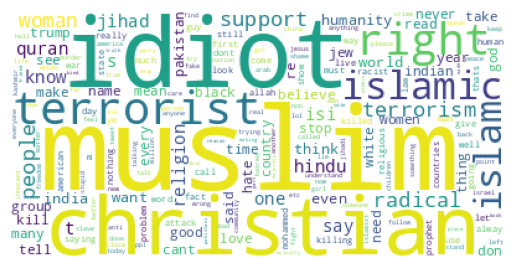

In [ ]:
word_cloud('religion')

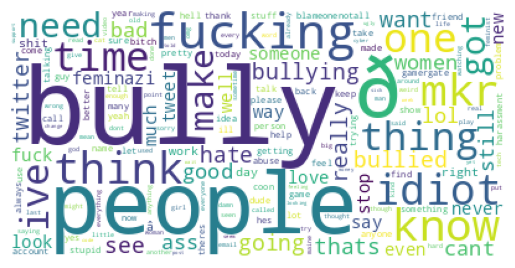

In [ ]:
word_cloud('other_cyberbullying')

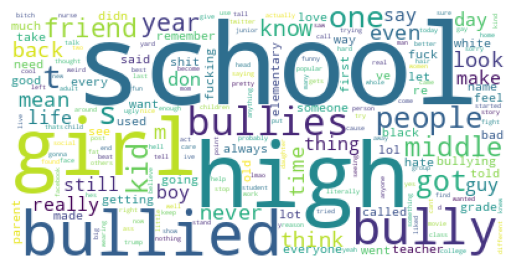

In [ ]:
word_cloud('age')

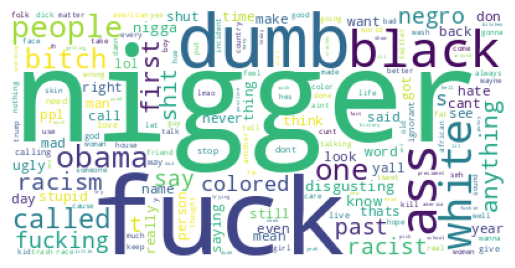

In [ ]:
word_cloud('ethnicity')

####**Sentiment Analysis using TextBlob**

For sentiment analysis, we used the the module TextBlob for natural language processing tasks. The sentiment analysis model considers various factors such as word polarity, intensity of sentiment, and context to determine the sentiment score for a given text.

This would help us in identifying sentiments - positive (➕), negative (➖), neutral; from a piece of text.

The sentiment score represents the polarity of the text (Positive, Negative, Neutral). It is a floating point number ranging from -1.0 to +1.0.

* If the sentiment score is close to 1.0, it indicates a very positive sentiment.

* If the sentiment score is close to -1.0, it indicates a very negative sentiment.

* If the sentiment score is around 0.0, it indicates a neutral sentiment.

In [ ]:
from textblob import TextBlob

def analyze_sentiment(data):
    sentiments = []
    text = df[df['cyberbullying_type'] == data]
    # Concatenate cleaned tweets into a single string
    text_cloud = " ".join(txt for txt in text['tweet_clean'])
    # Iterate over cleaned tweets
    for tweet in text['tweet_clean']:
        blob = TextBlob(tweet)
        sentiment_score = abs(blob.sentiment.polarity)  # Get absolute value of sentiment polarity
        sentiments.append(sentiment_score)
    return sentiments

# Call the function for each cyberbullying type
not_cyberbullying = analyze_sentiment('not_cyberbullying')
gender = analyze_sentiment('gender')
religion = analyze_sentiment('religion')
other_cyberbullying = analyze_sentiment('other_cyberbullying')
age = analyze_sentiment('age')
ethnicity = analyze_sentiment('ethnicity')

# Print average sentiment scores for each type
print("Average sentiment score for cyberbullying tweets:", (sum(gender)+sum(religion)+sum(age)+sum(ethnicity)+sum(other_cyberbullying)) / (len(gender)+len(religion)+len(age)+len(ethnicity)+len(other_cyberbullying)))
print("Average sentiment score for not_cyberbullying tweets:", sum(not_cyberbullying) / len(not_cyberbullying))
print()
print("Average sentiment score for gender cyberbullying tweets:", sum(gender) / len(gender))
print("Average sentiment score for religion cyberbullying tweets:", sum(religion) / len(religion))
print("Average sentiment score for age cyberbullying tweets:", sum(age) / len(age))
print("Average sentiment score for ethnicity cyberbullying tweets:", sum(ethnicity) / len(ethnicity))
print("Average sentiment score for other_cyberbullying cyberbullying tweets:", sum(other_cyberbullying) / len(other_cyberbullying))

Average sentiment score for cyberbullying tweets: 0.23214846589545213
Average sentiment score for not_cyberbullying tweets: 0.1815547775965969

Average sentiment score for gender cyberbullying tweets: 0.22401663356526427
Average sentiment score for religion cyberbullying tweets: 0.238556910412081
Average sentiment score for age cyberbullying tweets: 0.17458543980641456
Average sentiment score for ethnicity cyberbullying tweets: 0.2716344686110807
Average sentiment score for other_cyberbullying cyberbullying tweets: 0.2525084296956644


##Machine Learning

Machine learning is a bracnh of artificial intelligence that focuses on developing algorithms and statistical models that allow us to learn from our data and make any predicitons or decisions without explicitly programming it. Machine learning can identify patterns across large datasets that is impossible for the human to do so efficiently. The machine's performance can also be improved over time as they are more exposed to more data or by fine-tuning certain parameters.

**Train-Test Split**

We split the data into train and test with the proportion 75:25

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

x = df['tweet_clean']
y,class_names = pd.factorize(df['cyberbullying_type'],sort=True)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

x_train = [str(x) for x in X_train]
x_test  = [str(x) for x in X_test]

####**Naive Bayes Model**

Naive Bayes Model is a simple yet powerful machine learning algorithm used for NLP applications like text classification tasks, particularly in natural language processing (NLP). It's based on Bayes' theorem with the "naive" assumption of feature independence. Despite its simplicity, Naive Bayes often performs well in practice. In our classification, it performs moderately accurate.

In [ ]:
def Classifier(model):
    # Initialize a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the cleaned tweet data
    vectorizer.fit(df['tweet_clean'])

    # Transform training and testing data to TF-IDF vectors
    x_train_vecs = vectorizer.transform(x_train)
    x_test_vecs = vectorizer.transform(x_test)

    # Train the model on the TF-IDF vectors of the training data
    model.fit(x_train_vecs, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(x_test_vecs)

    # Print accuracy score and classification report
    print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print()
    print("Classification Report: \n", classification_report(y_test, y_pred))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as a heatmap
    sb.heatmap(conf_matrix, annot=True, fmt='d', cmap=None, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.729

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.99      0.79      1952
           1       0.82      0.91      0.86      1995
           2       0.79      0.83      0.81      1952
           3       0.65      0.34      0.45      2040
           4       0.61      0.37      0.46      2006
           5       0.77      0.97      0.86      1978

    accuracy                           0.73     11923
   macro avg       0.72      0.73      0.70     11923
weighted avg       0.72      0.73      0.70     11923



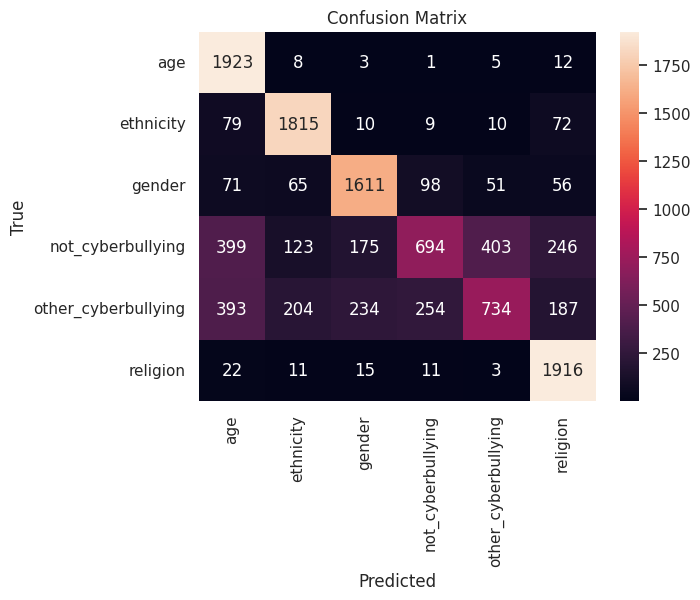

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes model pass it to the Classifier function
model = MultinomialNB()
Classifier(model)

**ROC Curve**

The ROC curve illustrates the balance between true positive rate (TPR) and false positive rate (FPR) across different thresholds. A model excels when its curve hugs the top-left corner, indicating high TPR and low FPR. Conversely, a curve closer to the diagonal line signifies poor ability to discriminate, no better than random chance.







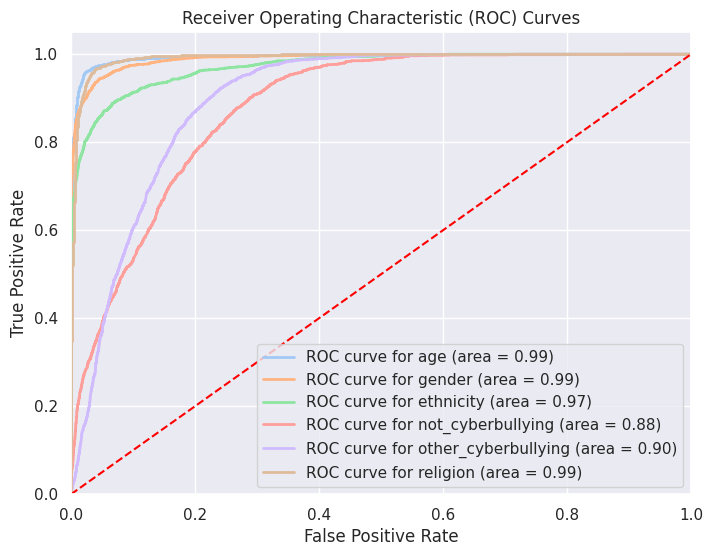

In [ ]:
#ROC Curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Define Class Labels
class_labels = [ 'age', 'gender', 'ethnicity', 'not_cyberbullying','other_cyberbullying', 'religion']

def plot_roc_curves(model, x_test, y_test):
    # Get the number of classes
    num_classes = len(np.unique(y_test))

    # Initialize the figure
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for each class
    for i in range(num_classes):
        # Treat the current class as positive and the rest as negative
        y_true_class = np.where(y_test == i, 1, 0)

        # Predict probabilities for the current class
        y_probs_class = model.predict_proba(x_test)

        # Calculate false positive rate and true positive rate
        fpr, tpr, _ = roc_curve(y_true_class, y_probs_class[:, i])

        # Calculate area under the curve
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the current class
        plt.plot(fpr, tpr, lw=2, label='ROC curve for {} (area = {:.2f})'.format(class_labels[i], roc_auc))

    # Plot random guess line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

    # Set plot labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Call the function with your trained model and test data
vectorizer   = TfidfVectorizer()
vectorizer.fit(df['tweet_clean'])
x_test_vecs  = vectorizer.transform(x_test)
plot_roc_curves(model, x_test_vecs, y_test)

**Learning Curve**

A learning curve is a plot that shows how a model's performance, often measured by accuracy, changes as the size of the training dataset increases. It helps assess if the model benefits from more data and can reveal issues like overfitting or underfitting. Cross-validation scores are often included for a more reliable estimate of performance.

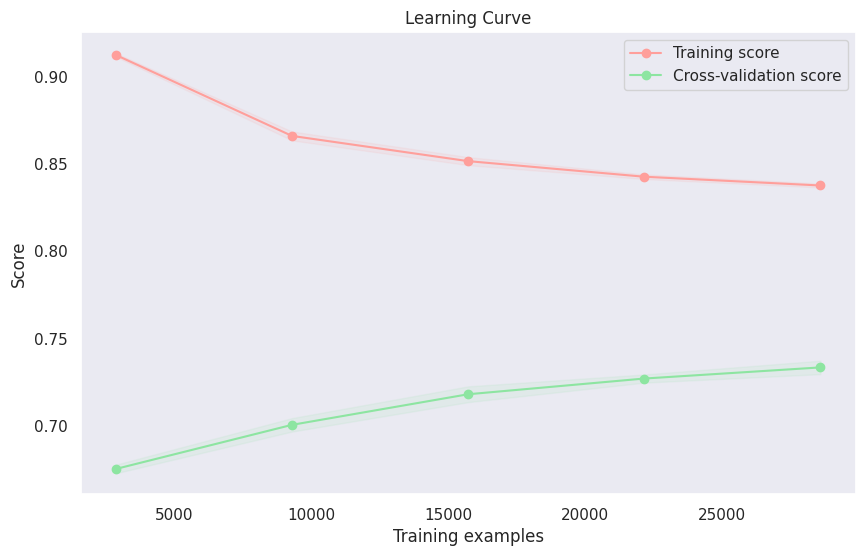

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve_multi_class(model, x_train, y_train, class_labels, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Call the function with your trained model, training data, and class labels
x_train_vecs = vectorizer.transform(x_train)
plot_learning_curve_multi_class(model, x_train_vecs, y_train, class_labels)

*ADVANTAGES*

🟢 Easy to understand and implement

🟢 Can be trained quickly and make fast predictions

🟢 Can solve multi-class prediction problems

*DISADVANTAGES*

🔴 Lousy estimator

####**Multinomial Logistic Regression**

Multinomial Logistic Regression extends Logistic Regression to handle multi-class classification tasks by predicting probabilities for each class and selecting the class with the highest probability as the predicted output. he model shows good results in prediction of cyberbullying type in our tweets.


Accuracy: 0.814

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1952
           1       0.97      0.97      0.97      1995
           2       0.93      0.81      0.87      1952
           3       0.57      0.56      0.57      2040
           4       0.57      0.65      0.61      2006
           5       0.96      0.94      0.95      1978

    accuracy                           0.81     11923
   macro avg       0.82      0.82      0.82     11923
weighted avg       0.82      0.81      0.82     11923



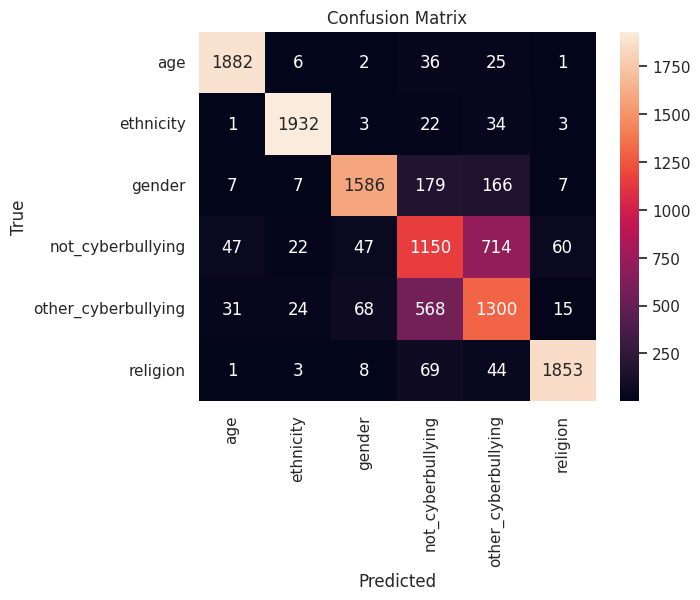

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model pass it to the Classifier function
model = LogisticRegression(max_iter=1000)
Classifier(model)

**ROC Curve**

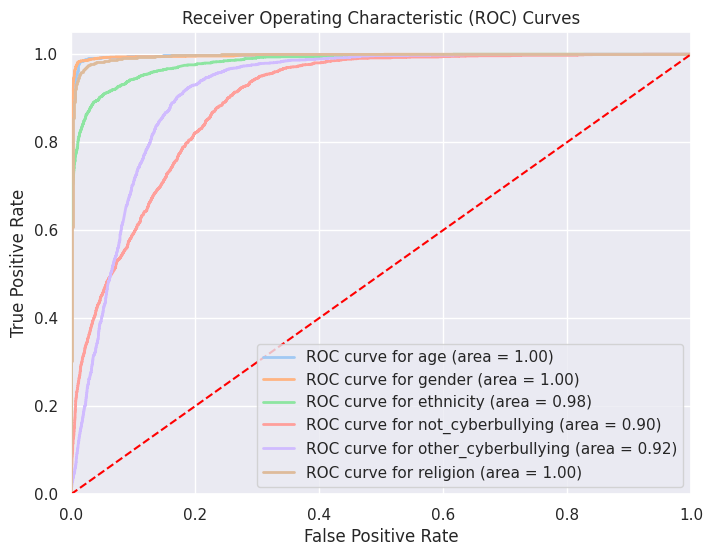

In [ ]:
plot_roc_curves(model, x_test_vecs, y_test)

**Learning Curve**

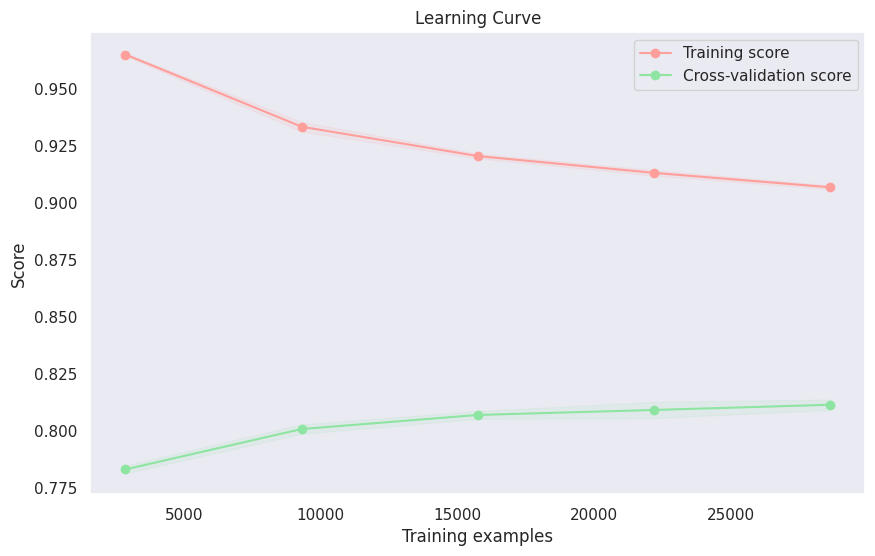

In [ ]:
plot_learning_curve_multi_class(model, x_train_vecs, y_train, class_labels)

*ADVANTAGES*

🟢 Provides probabilities for each category, allowing for nuanced predictions and quantification of uncertainty.

🟢 Enables decision-makers to assess the likelihood of different outcomes, aiding in informed decision-making.

🟢 Facilitates understanding of how predictors influence category selection, enhancing model interpretability.

*DISADVANTAGES*

🔴 Assumes independence of observations, which may not hold in all datasets.

🔴 Violation can lead to biased parameter estimates and inaccurate inference.

🔴 Typically needs a larger sample size compared to a binary logistic regression.

####**Support Vector Machine**

SVM classification finds the best hyperplane to separate data into different classes, maximizing the margin between them. It's effective for various classification tasks due to its ability to handle linear and non-linear separations through kernel functions.

Accuracy: 0.811

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1952
           1       0.97      0.97      0.97      1995
           2       0.93      0.80      0.86      1952
           3       0.59      0.49      0.54      2040
           4       0.54      0.71      0.61      2006
           5       0.96      0.93      0.95      1978

    accuracy                           0.81     11923
   macro avg       0.83      0.81      0.82     11923
weighted avg       0.82      0.81      0.81     11923



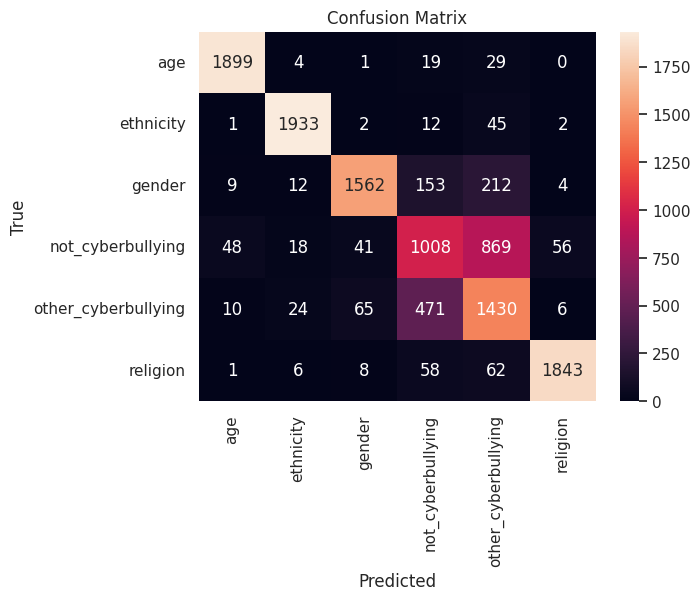

In [ ]:
from sklearn.svm import SVC

# Initialize SVC model pass it to the Classifier function
model=SVC(probability=True)
Classifier(model)

**ROC**

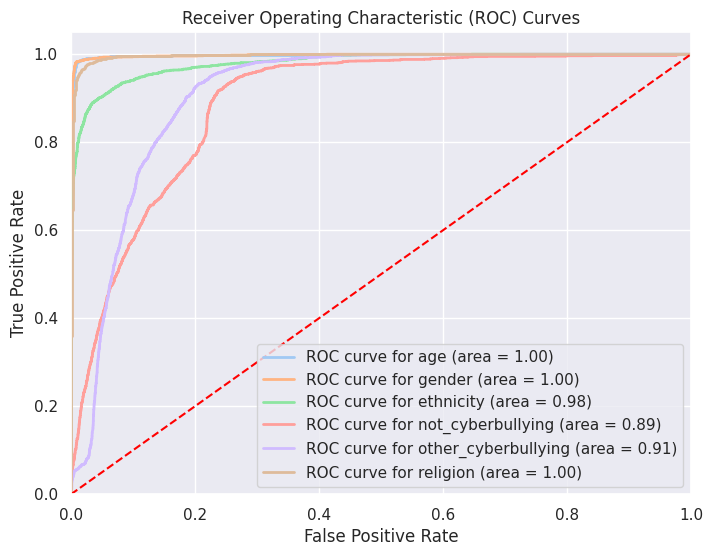

In [ ]:
plot_roc_curves(model, x_test_vecs, y_test)

**Learning Curve**

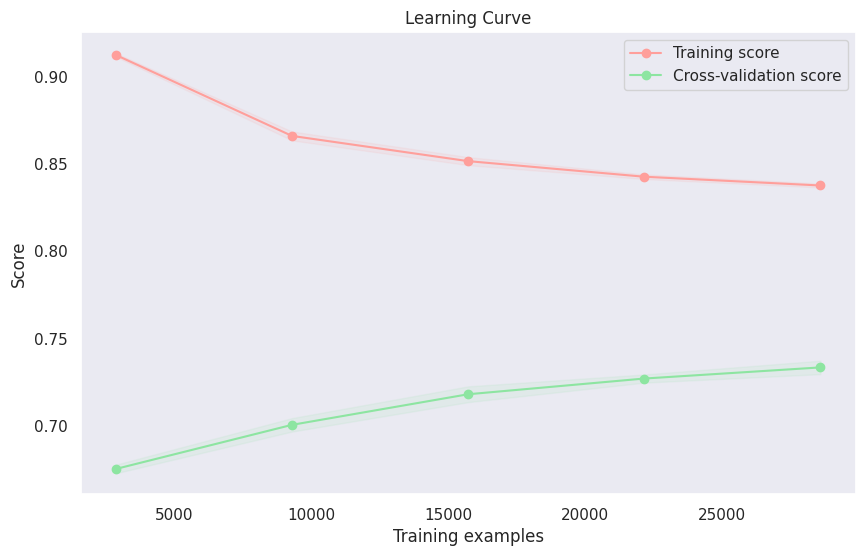

In [ ]:
plot_learning_curve_multi_class(model, x_train_vecs, y_train, class_labels)

*ADVANTAGES*

🟢 Performs well even in high-dimensional spaces, making it suitable for complex datasets.

🟢 Aims to maximize the margin between classes, leading to a more generalizable model and reducing the risk of overfitting.

🟢 Can handle non-linear decision boundaries using kernel functions like polynomial, radial basis function (RBF), and sigmoid, providing flexibility in modeling complex relationships.

*DISADVANTAGES*

🔴 Training models can be computationally intensive, especially for large datasets.

🔴 SVM is sensitive to noisy data and outliers, which can affect the placement of the decision boundary and degrade performance.

🔴 The decision boundary produced by SVM may be difficult to interpret, especially in higher dimensions or with non-linear kernels, making it challenging to understand the underlying relationships in the data.

####**Random Forest Classifier**

Random Forest Classifier is an ensemble learning technique for classification tasks, which builds multiple decision trees and outputs the mode of the classes predicted by individual trees. It's effective, versatile, and resistant to overfitting. The model shows good results in prediction of cyberbullying type in our tweets.

Accuracy: 0.814

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1952
           1       0.98      0.98      0.98      1995
           2       0.90      0.83      0.86      1952
           3       0.58      0.47      0.52      2040
           4       0.54      0.67      0.60      2006
           5       0.95      0.96      0.95      1978

    accuracy                           0.81     11923
   macro avg       0.82      0.82      0.82     11923
weighted avg       0.82      0.81      0.81     11923



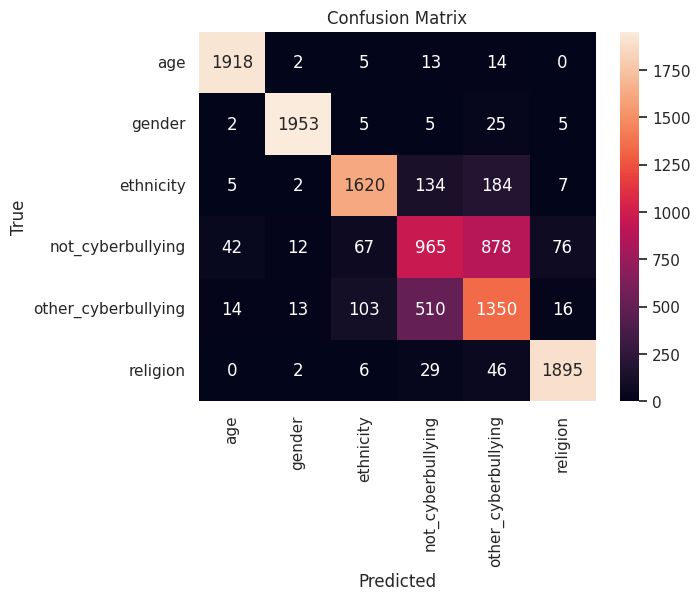

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model pass it to the Classifier function
model=RandomForestClassifier()
Classifier(model)

**ROC Curve**

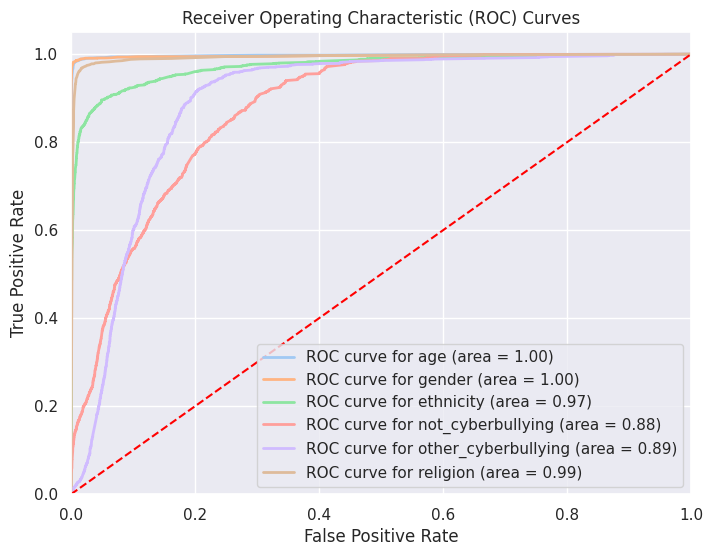

In [ ]:
plot_roc_curves(model, x_test_vecs, y_test)

**Learning Curve**

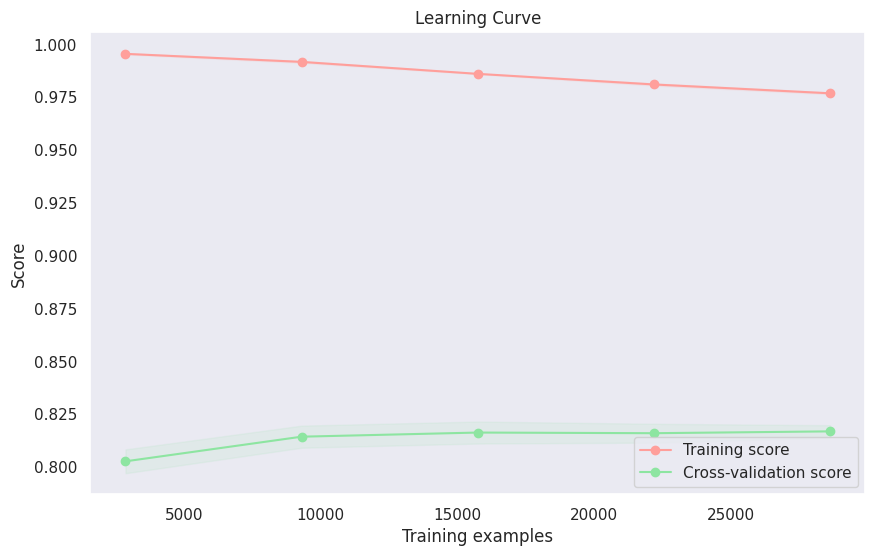

In [ ]:
plot_learning_curve_multi_class(model, x_train_vecs, y_train, class_labels)

*ADVANTAGES*

🟢 Often produces highly accurate predictions, even without extensive hyperparameter tuning.

🟢 By aggregating predictions from multiple decision trees, Random Forest is less prone to overfitting compared to individual decision trees.

🟢 Random Forest can efficiently handle large datasets with many features and instances, making it suitable for complex problems.

🟢 Can handle missing values in the dataset without the need for imputation, reducing preprocessing requirements.

*DISADVANTAGES*

🔴 The ensemble nature of it makes it less interpretable compared to simpler models, as it's challenging to trace predictions back to individual trees.

🔴 Training this model can be computationally expensive, especially for large datasets with numerous trees and deep trees.

🔴 Random Forest tends to be biased towards the majority class in imbalanced datasets, potentially leading to suboptimal performance for minority classes.

####**Bi-LSTM**

LSTM, a renowned type of recurrent neural network (RNN) is used for processing sequential data and capturing long-term dependencies. We employ Bidirectional LSTM (BiLSTM) to extend this capability by processing input sequences in both forward and backward directions, effectively capturing contextual information.

**Architecture:**

The model architecture incorporates:

- An input embedding layer initialized with pre-trained word embeddings from Word2Vec, capturing the semantic meanings of tweets.

- A core LSTM layer, processing input sequences bidirectionally to capture nuanced relationships between words.

- An attention mechanism, focusing on important parts of the input sequence and enhancing the model's classification performance.

**Training:**

During training, the model parameters are optimized using the AdamW optimizer and minimize the negative log-likelihood loss function (NLLLoss). We define hyperparameters such as:

*Number of classes:* 6

*Hidden dimensions:* 100

*Number of LSTM layers:* 1

*Dropout rate*

*Learning rate*

*Number of epochs: *10

Epochs refer to the number of times the entire dataset is passed forward and backward through the neural network during training. We implement early stopping based on validation accuracy to prevent overfitting.

**Model Evaluation:**

The best-performing model, based on validation accuracy, is selected for evaluation. After training, we evaluate the model on the test data and compute the classification report. The model achieves an accuracy of 0.81, demonstrating the effectiveness of our LSTM-based approach in cyberbullying tweet classification.

In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
Word2vec_train_data = list(map(lambda x: x.split(), x_train))
EMBEDDING_DIM = 200
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 53186


In [ ]:
# Define a function to map sentiment labels to numerical values
df['sentiment'] = df['cyberbullying_type'].replace({
    'religion': 5,
    'age': 0,
    'ethnicity': 1,
    'gender': 2,
    'not_cyberbullying': 3,
    'other_cyberbullying': 4
})

# Define embedding matrix
VOCAB_SIZE = len(vocabulary) + 1
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

# Fill the embedding matrix with pre-trained values from word2vec
for word, token in vocabulary:
    if word in word2vec_model.wv.key_to_index:
        embedding_vector = word2vec_model.wv[word]
        embedding_matrix[token] = embedding_vector
print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (53186, 200)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from imblearn.over_sampling import RandomOverSampler
import torch

X = tokenized_column
y = df['sentiment'].values

# Split data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# Apply Random Over Sampling
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train), np.array(y_train))

# Convert data into PyTorch DataLoader
BATCH_SIZE = 32
train_data = TensorDataset(torch.from_numpy(X_train_os), torch.from_numpy(y_train_os))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=BATCH_SIZE, drop_last=True)

In [ ]:
import torch.nn as nn

# Define the Attention module
class Attention(nn.Module):
    def __init__(self, hidden_dim, is_bidirectional):
        super(Attention, self).__init__()
        self.is_bidirectional = is_bidirectional
        self.attn = nn.Linear(hidden_dim * (4 if is_bidirectional else 2), hidden_dim * (2 if is_bidirectional else 1))
        self.v = nn.Linear(hidden_dim * (2 if is_bidirectional else 1), 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        seq_len = encoder_outputs.size(1)
        if self.is_bidirectional:
            hidden = torch.cat((hidden[-2], hidden[-1]), dim=-1)
        else:
            hidden = hidden[-1]
        hidden_repeated = hidden.unsqueeze(1).repeat(1, seq_len, 1)
        attn_weights = torch.tanh(self.attn(torch.cat((hidden_repeated, encoder_outputs), dim=2)))
        attn_weights = self.v(attn_weights).squeeze(2)
        return nn.functional.softmax(attn_weights, dim=1)

# Define the LSTM Sentiment Classifier
class LSTM_Sentiment_Classifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, dropout, is_bidirectional):
        super(LSTM_Sentiment_Classifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = lstm_layers
        self.is_bidirectional = is_bidirectional

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, lstm_layers, batch_first=True, bidirectional=is_bidirectional)
        self.attention = Attention(hidden_dim, is_bidirectional)
        self.fc = nn.Linear(hidden_dim * (2 if is_bidirectional else 1), num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, hidden):
        embedded = self.embedding(x)
        out, hidden = self.lstm(embedded, hidden)
        attn_weights = self.attention(hidden[0], out)
        context = attn_weights.unsqueeze(1).bmm(out).squeeze(1)
        out = self.softmax(self.fc(context))
        return out, hidden

    def init_hidden(self, batch_size):
        factor = 2 if self.is_bidirectional else 1
        h0 = torch.zeros(self.num_layers * factor, batch_size, self.hidden_dim).to(DEVICE)
        c0 = torch.zeros(self.num_layers * factor, batch_size, self.hidden_dim).to(DEVICE)

In [ ]:
NUM_CLASSES = 6
HIDDEN_DIM = 100
LSTM_LAYERS = 1
IS_BIDIRECTIONAL = False
LR = 4e-4
DROPOUT = 0.5
EPOCHS = 10
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

model = LSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, NUM_CLASSES, LSTM_LAYERS, DROPOUT, IS_BIDIRECTIONAL)
model = model.to(DEVICE)

# Initialize the embedding layer with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
model.embedding.weight.requires_grad = True

# Set up the criterion (loss function) and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=5e-6)
print(model)

LSTM_Sentiment_Classifier(
  (embedding): Embedding(53186, 200)
  (lstm): LSTM(200, 100, batch_first=True)
  (attention): Attention(
    (attn): Linear(in_features=200, out_features=100, bias=True)
    (v): Linear(in_features=100, out_features=1, bias=False)
  )
  (fc): Linear(in_features=100, out_features=6, bias=True)
  (softmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
# Train the model
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0
valid_acc_max = 0

for e in range(EPOCHS):
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []
    y_train_list, y_val_list = [], []
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0

    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        h = model.init_hidden(labels.size(0))
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
        y_pred_train = torch.argmax(output, dim=1)
        y_train_list.extend(y_pred_train.squeeze().tolist())
        correct += torch.sum(y_pred_train == labels).item()
        total += labels.size(0)
    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    with torch.no_grad():
        model.eval()
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            val_h = model.init_hidden(labels.size(0))
            output, val_h = model(inputs, val_h)
            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()
            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())
            correct_val += torch.sum(y_pred_val == labels).item()
            total_val += labels.size(0)
        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter = 0
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter += 1

    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break

    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 75.952915).  Saving model ...
	Train_loss : 0.8717 Val_loss : 0.5480
	Train_acc : 62.955% Val_acc : 75.953%
Epoch 2:Validation accuracy increased (75.952915 --> 77.970852).  Saving model ...
	Train_loss : 0.4482 Val_loss : 0.4836
	Train_acc : 78.935% Val_acc : 77.971%
Epoch 3:Validation accuracy increased (77.970852 --> 80.114910).  Saving model ...
	Train_loss : 0.3407 Val_loss : 0.5026
	Train_acc : 85.120% Val_acc : 80.115%
Epoch 4:Validation accuracy did not increase
	Train_loss : 0.2513 Val_loss : 0.5143
	Train_acc : 90.177% Val_acc : 79.751%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.1962 Val_loss : 0.5889
	Train_acc : 92.676% Val_acc : 79.498%
Epoch 6:Validation accuracy did not increase
	Train_loss : 0.1603 Val_loss : 0.6020
	Train_acc : 94.184% Val_acc : 79.134%
Epoch 7:Validation accuracy did not increase
	Train_loss : 0.1374 Val_loss : 0.6403
	Train_acc : 94.950% Val_acc : 79.274%
Epoch 8:Validation accurac

In [ ]:
model.load_state_dict(torch.load('./state_dict.pt'))
sentiments = ["age", "ethnicity", "gender", "other_cyberbullying", "not bullying","religion"]

def evaluate_model(model, test_loader):
    model.eval()
    y_pred_list = []
    y_test_list = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            test_h = model.init_hidden(labels.size(0))
            output, val_h = model(inputs, test_h)
            y_pred_test = torch.argmax(output, dim=1)
            y_pred_list.extend(y_pred_test.squeeze().tolist())
            y_test_list.extend(labels.squeeze().tolist())
    return y_pred_list, y_test_list

y_pred_list, y_test_list = evaluate_model(model, test_loader)
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=sentiments))

Classification Report for Bi-LSTM :
                      precision    recall  f1-score   support

           religion       0.95      0.92      0.94      1974
                age       0.98      0.96      0.97      1952
          ethnicity       0.93      0.98      0.95      1991
             gender       0.83      0.84      0.83      1950
other_cyberbullying       0.56      0.50      0.53      2034
       not bullying       0.58      0.64      0.61      2003

           accuracy                           0.81     11904
          macro avg       0.81      0.81      0.81     11904
       weighted avg       0.80      0.81      0.80     11904



ADVANTAGES

🟢 Proccesses input sequences in both forward and backward directions helps in understanding the complete context of the input sequence.

🟢 Well-suited for capturing long-term dependencies in sequential data and can effectively model complex dependencies over extended sequences.

🟢 Random Forest can efficiently handle large datasets with many features and instances, making it suitable for complex problems.

🟢 The gated architecture of LSTM cells helps mitigate the vanishing gradient problem, making it more capable of learning and retaining information over long sequences.

DISADVANTAGES

🔴 Effectively doubles the computational cost of processing each input sequence compared to unidirectional LSTMs.

🔴 Require more memory to store the activations and gradients for both forward and backward processing directions.

🔴 Complex models with multiple layers and bidirectional processing, make them less interpretable compared to simpler models.

🔴 Prone to overfitting, especially when trained on small datasets or when the model capacity is too high relative to the dataset size.

##User Input Tool

User can input any tweet to estimate the label of cyberbullying. In order to get quick results, we will use the Naive Bayes Model. But any other can be used for imporved accuracy.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

def Classifier(model,text, x_train, y_train):
    # Initialize a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the cleaned tweet data
    vectorizer.fit(x_train)

    # Transform training data to TF-IDF vectors
    x_train_vecs = vectorizer.transform(x_train)

    # Transform input text to TF-IDF vector
    x_test_vecs = vectorizer.transform([text])

    # Train the model on the TF-IDF vectors of the training data
    model.fit(x_train_vecs, y_train)

    # Predict the label for the input text
    y_pred = model.predict(x_test_vecs)

    return y_pred

# Example usage
text = input("Enter a string to find the label of cyberbullying: ")
predicted_label = Classifier(MultinomialNB(),text, x_train, y_train)
class_labels = [ 'age', 'gender', 'ethnicity', 'not_cyberbullying','other_cyberbullying', 'religion']
print("Predicted Label:", class_labels[predicted_label[0]])

Enter a string to find the label of cyberbullying: The weather is amazing today
Predicted Label: not_cyberbullying


##Comparison of Results

\begin{array}{ccc}
PARAMETER\; & Naive Bayes\;\ & Logistic Regression\;\ & SVM\;\ & Random Forest\;\ & LSTM\;\\
Accuracy\; & 0.73\;\ & 0.81\;\ & 0.81\;\ & 0.81\;\ & 0.81\;\\
Precision\; & 0.72\;\ & 0.82\;\ & 0.82\;\ & 0.82\;\ & 0.80\;\\
Recall\; & 0.81\;\ & 0.81\;\ & 0.81\;\ & 0.81\;\ & 0.81\;\\
F1-Score\; & 0.70\;\ & 0.82\;\ & 0.81\;\ & 0.81\;\ & 0.80\;\\
Support\; & 11,923\;\ & 11,923\;\ & 11,923\;\ & 11,923\;\ & 11,904\;\\
Running Time\; & 5-10s\;\ & 1.5-2min\;\ & 20 min\;\ & 30 min\;\ & 2 hours\;\\
\end{array}

Trading off both running time and accuracy of predictions, we can conclude that Logistic Regression mught be the most effecient to classify cyberbullying in tweets for this dataset. However, by virtue of its working method, Bi-LSTM might still work better in further unseen data with better training.

\begin{array}{ccc}
PRECISION\; & Religion\;\ & Age\;\ & Ethinicity\;\ & Gender\;\ &Others\;\ &Not Cyberbullying\;\\
Naive Bayes\; & 0.77\;\ & 0.67\;\ & 0.82\;\ & 0.79\;\ & 0.65\;&0.61\;\\
Logistic Regression\; & 0.96\;\ & 0.96\;\ & 0.97\;\ & 0.83\;\ &0.57\;\ &0.57\;\\
SVM\; & 0.96\;\ & 0.96\;\ & 0.97\;\ & 0.93\;\ & 0.59\;& 0.54\;\\
Random Forest\; & 0.95\;\ & 0.97\;\ & 0.98\;\ & 0.90\;\ & 0.58\;& 0.54\;\\
LSTM\; & 0.95\;\ &0.98\;\ &0.93\;\ &0.83\;\ &0.56\;\ &0.64\;\\
\end{array}

We can infer that the classification models used are generally strong in classifying tweets based on religion, age, ethinicity and gender-based cyberbullying. However, they struggle to classify other categories of cyberbullying or not cyberbullying at all.

The same views can observed through the Confusion Matrices, ROC Curves and Learning Curves

##Data Driven Insights and Recommendations

Our project shines bright in the outlook to identify and curb cyberbullying. Here are some data driven outsights and recommendations as a result-

1. **Targeted Intervention**

The identification of demographic-specific patterns in cyberbullying behavior can inform targeted intervention strategies tailored to address the vulnerabilities of different groups

2. **Model Refinement**

Continuously refining and updating the cyberbullying detection models based on new data and insights is essential for maintaining their effectiveness over time.

3. **Community Engagement**

Engaging with community stakeholders, including social media platforms, is essential for fostering collaboration and implementing effective measures to combat cyberbullying

##Future Outlook

There are significant scopes for improvement in our project in the future that can be done to enhance its working and application in the broader view. Here are some features we wish to integrate in the future-

1. **Advanced Machine Learning Techniques**

Can be used to enhance the accuracy and sophistication of the Cyberbullying detection models

2. **Multimodal Analysis**

Integrating multimodal data sources, such as text, images, and videos, can provide a more comprehensive understanding of cyberbullying behaviors

3. **User-Centric Approaches**

Incorporating user feedback and preferences into cyberbullying detection systems can enhance their effectiveness and user acceptance